# **Jacob Shearer - Excercise Set 3**

In [67]:
import numpy as np
import scipy as sp
import scipy.optimize
import matplotlib.pyplot as plt
import random

**Question 1:**

In [68]:
random.seed(1)

def monte_carlo_int(a, b, N, function, weight_function=None, inverted_function = None):
    total_sum = 0
    total_sum_squared = 0
    for i in range(N):
        if weight_function is not None and inverted_function is not None:
            y = random.uniform(inverted_function(a), inverted_function(b))
            x = inverted_function(y)
            result = function(x)/weight_function(x)
        else:
            result = function(random.uniform(a, b))
            
        total_sum += result
        total_sum_squared += result**2
    
    result = (total_sum/N)*(b-a)
    uncertainty = np.sqrt(((total_sum_squared)/N - (total_sum/N)**2)/N)
    return result, uncertainty

$$\int_{0}^{\pi}\sin x dx = 2$$

In [73]:
# Part (a):
print('Part (a):')
integrand = lambda x: np.sin(x)
N_array = np.array([10, 50, 100, 500, 1000, 5000, 10000])
estimated_uncertainty = np.array([])
for N in N_array:
    result, uncertainty = monte_carlo_int(0, np.pi, N, integrand)
    estimated_uncertainty = np.append(estimated_uncertainty, uncertainty)
    print(f'For N = {N}:')
    print(f'     Integral = {result} ± {uncertainty}')
    print(f'     Result differs from the analytic solution by {np.abs(2-result)}')
    print('\n')

Part (a):
For N = 10:
     Integral = 2.277521982208382 ± 0.1042387157494021
     Result differs from the analytic solution by 0.27752198220838187


For N = 50:
     Integral = 2.001207739425435 ± 0.04275382304287188
     Result differs from the analytic solution by 0.0012077394254350615


For N = 100:
     Integral = 1.9117069659370223 ± 0.030956170258174005
     Result differs from the analytic solution by 0.08829303406297773


For N = 500:
     Integral = 2.0446504765896205 ± 0.01395400260441144
     Result differs from the analytic solution by 0.044650476589620514


For N = 1000:
     Integral = 1.9896507516809772 ± 0.009715293248001378
     Result differs from the analytic solution by 0.010349248319022841


For N = 5000:
     Integral = 1.9840135525078142 ± 0.004432222154363872
     Result differs from the analytic solution by 0.015986447492185807


For N = 10000:
     Integral = 2.0090876835222264 ± 0.003072616033048559
     Result differs from the analytic solution by 0.00908768

Part (b):


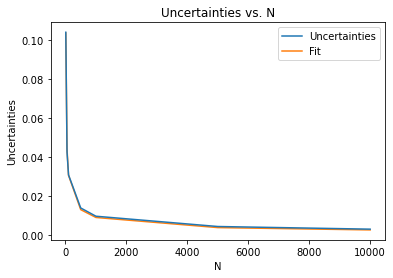

Fit exponent: -0.529361332968474
Judging by the plot and the fit, it appears that the estimated error scales as N^-1/2.


In [74]:
# Part(b):
print('Part (b):')
plt.plot(N_array, estimated_uncertainty, label='Uncertainties', zorder=1)
plt.title('Uncertainties vs. N')
plt.xlabel('N')
plt.ylabel('Uncertainties')

fit_function = lambda x, a, b: a*x**b
params, cov = scipy.optimize.curve_fit(fit_function, N_array, estimated_uncertainty)
plt.plot(N_array, params[0]*N_array**params[1], label='Fit', zorder=0)

plt.legend()
plt.title('Uncertainties vs. N')
plt.xlabel('N')
plt.ylabel('Uncertainties')
plt.show()

print(f'Fit exponent: {params[1]}')
print('Judging by the plot and the fit, it appears that the estimated error scales as N^-1/2.')

Part (c):


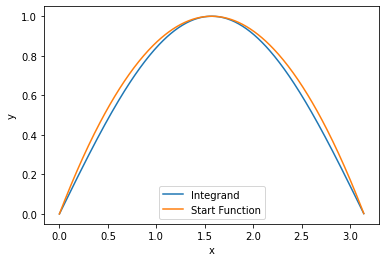

In [77]:
# Part (c):
print ('Part (c):')
x = np.arange(0,np.pi, 0.01)
start_function = lambda t: (4/(np.pi**2)) * t * (np.pi - t)
plt.plot(x, np.sin(x), label='Integrand')
plt.plot(x, start_function(x), label='Start Function')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

The function $ y(x) = \frac{4}{\pi^2}x(\pi-x)$  very closely matches the integrand on the interval $[0, \pi]$, so we'll start there.
<br/>
The function must be normalized first, i.e.
    $$ \int_{0}^{\pi}c\frac{4}{\pi^2}x(\pi-x) dx = 1 $$
where $c$ is a normalization constant. Solving this, we get:
    $$ c \cdot \frac{2\pi}{3} = 1$$
so $c=\frac{3}{2\pi}$, which makes our weight function
    $$ w(x) = \frac{6}{\pi^3}x(\pi-x)$$
<br/>
Integrating $w(t)$ from $0$ to $x$, we end up with:
    $$ y(x) = \int_{0}^{x}\frac{6}{\pi^3}t(\pi-t) dt = \frac{6}{\pi^3}(\frac{\pi x^2}{2} - \frac{x^3}{3})$$
And finally, inverting $y(x)$ gives us $y^{-1}(x)$:
    $$ y^{-1}(x) = \frac{1}{2}(\pi a + \frac{\pi}{a} + \pi) $$
where
    $$ a = \sqrt[3]{2\sqrt{y^2 - y} - 2y + 1}$$.

In [89]:
inverted_function = lambda y: (1/2) * (np.pi*(np.cbrt((2*np.sqrt(y**2 - y)) - (2*y) + 1)) + 
                    np.pi/(np.cbrt((2*np.sqrt(y**2 - y)) - (2*y) + 1)) + np.pi)
weight_function = lambda x: (6/np.pi**3)*x*(np.pi-x)
estimated_uncertainty = np.array([])
for N in N_array:
    result, uncertainty = monte_carlo_int(0, np.pi, N, integrand, weight_function, inverted_function)
    estimated_uncertainty = np.append(estimated_uncertainty, uncertainty)
    print(f'For N = {N}:')
    print(f'     Integral = {result} ± {uncertainty}')
    print(f'     Result differs from the analytic solution by {np.abs(2-result)}')
    print('\n')

For N = 10:
     Integral = 1.1941669433415902 ± 0.04911055271054415
     Result differs from the analytic solution by 0.8058330566584098


For N = 50:
     Integral = nan ± nan
     Result differs from the analytic solution by nan


For N = 100:
     Integral = nan ± nan
     Result differs from the analytic solution by nan


For N = 500:
     Integral = nan ± nan
     Result differs from the analytic solution by nan


For N = 1000:
     Integral = nan ± nan
     Result differs from the analytic solution by nan


For N = 5000:
     Integral = nan ± nan
     Result differs from the analytic solution by nan




C:\Users\Jacob\AppData\Local\Temp/ipykernel_26872/1663972378.py:1: RuntimeWarning: invalid value encountered in sqrt
  inverted_function = lambda y: (1/2) * (np.pi*(np.cbrt((2*np.sqrt(y**2 - y)) - (2*y) + 1)) +
C:\Users\Jacob\AppData\Local\Temp/ipykernel_26872/1663972378.py:2: RuntimeWarning: invalid value encountered in sqrt
  np.pi/(np.cbrt((2*np.sqrt(y**2 - y)) - (2*y) + 1)) + np.pi)


For N = 10000:
     Integral = nan ± nan
     Result differs from the analytic solution by nan




Part (d):


ValueError: array must not contain infs or NaNs

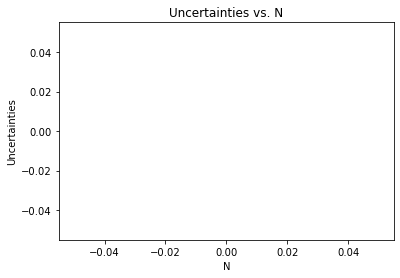

In [64]:
# Part(d):
print('Part (d):')
plt.plot(N_array, estimated_uncertainty, label='Uncertainties', zorder=1)
plt.title('Uncertainties vs. N')
plt.xlabel('N')
plt.ylabel('Uncertainties')

fit_function = lambda x, a, b: a*x**b
params, cov = scipy.optimize.curve_fit(fit_function, N_array, estimated_uncertainty)
plt.plot(N_array, params[0]*N_array**params[1], label='Fit', zorder=0)

plt.legend()
plt.title('Uncertainties vs. N')
plt.xlabel('N')
plt.ylabel('Uncertainties')
plt.show()

print(f'Fit exponent: {params[1]}')

**Question 2:**